<a href="https://colab.research.google.com/github/Hernan4444/Hernan4444-diplomado-sistemas-recomendadores-2020-1/blob/master/Diplomado_2020_Sistemas_Recomendadores_Tutorial_de_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diplomado Sistemas Recomendadores

# Tutorial Tensorflow

En este tutorial se enseñarán los métodos, funciones y objetos más recurridos en Tensorflow 2 para poder confeccionar un modelo de clasificación. Para este caso, lo haremos para resolver una tarea de clasificación de imágenes. 

Se **recomienda fuertemente** ir viendo los comentarios a los códigos relaiazdos con Tensorflow  porque en el práctico final se les puede hacer preguntas sobre algunos conceptos importantes de este framework para programar modelos de deep learning.



**Autor**: Hernán Valdivieso y Manuel Cartagena.

**Ayudantes**: Hernán Valdivieso y Manuel Cartagena.

# Índice


>[Diplomado Sistemas Recomendadores](#scrollTo=RQxbH092ZXYJ)

>[Tutorial Tensorflow](#scrollTo=RQxbH092ZXYJ)

>[Índice](#scrollTo=RQxbH092ZXYJ)

>[Crear un modelo](#scrollTo=w7GH674codPT)

>[Cargar dataset](#scrollTo=Irey2TgPofwA)

>[Entrenar](#scrollTo=ZPJDDkFsoj1d)

>[Validar](#scrollTo=fYbUmaPRong0)

>[Probar el modelo con una instancia](#scrollTo=C0j4470gopYW)

>[Guardar modelo](#scrollTo=n6dcEo3qDetK)

>>[Guardar pesos](#scrollTo=iK7ZBk2zDiX3)

>>[Guardar modelo](#scrollTo=wUt-6IQNApZI)

>[Cargar modelo](#scrollTo=FhXDVZI5Dbbq)

>>[Cargar pesos](#scrollTo=7REvQGQN085r)

>>[Cargar todo el modelo](#scrollTo=HFJsFFgKCQNN)



# GPU

Antes de empezar a ejecutar una línea, vamos a verificar si disponemos de GPU para así realizar todo este procedimiento con mayor rapidez. No se preocupe si no hay GPU disponible, el código funcionará de todas formas, solo que más lento.


In [0]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

Si la lista anterior sale vacía (`[]`) y desea activar GPU en google colab, entonces deben ir a la barra superior, click en **Entorno de ejecución**, **Cambiar tipo de entorno de ejecución** y donde dice "Acelerador de hardware", escoger **GPU**. Luego volver a ejecutar la casilla anterior y verificar que la lista no esté vacía. 

# Cargar dataset

Para esta ocasión, vamos a ustilizar el dataset CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html). 

¿Cómo es CIFAR-10? Éste consiste en imágenes de 10 entidades distintas:
*   airplane
*   automobile
*   bird
*   cat
*   deer
*   dog
*   frog
*   horse
*   ship
*   truck

Cada imagen es de 32 x 32 píxeles. Cada pixel está a color así que utiliza 3 números para indicar la cantidad de rojo, azul y verde que se compone.

Ahora, vamos a usar las facultades de tensorflow para cargar el set de entrenamiento y test del dataset CIFAR-10

In [0]:
from tensorflow.keras import datasets

# Descargar dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar datos para que estén entre 0 y 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 4s 0us/step


Aprovechemos de ver qué tipo de imágenes vienen en el dataset. Este código fue obtenido de https://www.tensorflow.org/tutorials/images/cnn

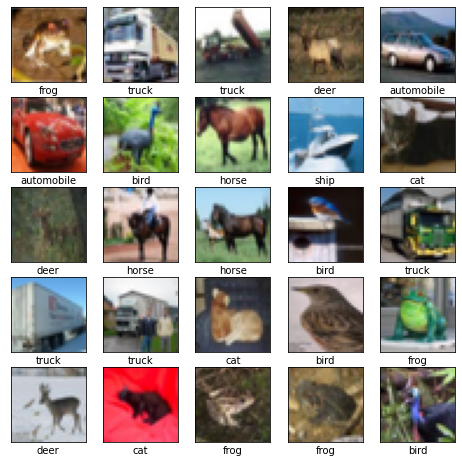

In [0]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizar algunas imágenes.
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Crear un modelo

En esta sesión vamos a crear un modelo de clasificación. Si bien existen varias formas de crear un modelo con Tensorflow, en este tutorial utilizaremos la forma de crear una clase.

Lo primero que haces es importar algunos objetos requeridos dentro de Tensorflow como `Model` y capas como: `Dense`, `Flatten`, `Conv2D`.

Es importante destacar que este tutorial no tiene como foco explicar las diversas capas que tiene un modelo de _deep learning_ sino el como trabajar con ellas para crear el modelo. Es suficiente con que sepan identificar con qué capas cuenta el modelo por ahora.

Para crear un modelo mediante clases, hay 2 pasos importantes:
1. Definir las capas
2. Conectar las capas.

## Definir las capas.

Este proceso se hace dentro del método `__init__()` de la nueva clase y consiste en solo declarar cada capa que va a tener el modelo. En este caso tendremos una capa convulucional (`Conv2D`), capas de aplanamiento (`Flatten`) y capas densas (`Dense`). 

Algunas capas se les debe entregar argumentos como que función de activación utilizar despues de aplicar una capa. En este caso, estamos utilizando la función `relu`  y la función `softmax`.

## Conectar capas

Este proceso se hace dentro del método `call()` y consiste en ir uniendo la salida de una capa con la entrada de otra. Para lograr esto, lo que haces es pasar las imágenes que nos llegan por la capa convolucionar `self.conv(images)`, el resultado de eso (`x`) lo pasamos por una capa de aplanamiento `self.flatten(x)`. Luego, dicho resultado lo pasamos por la primera capa densa `self.dense_1(x)` que va a retornar un vector de 512 números y finalmente pasamos dicho vector por otra capa densa `self.dense_2(x)` que retorna un vector de 10 números, los cuales representan la probabilida de que la imagen esté en la clae 0 a 9.


In [0]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D
import tensorflow

# Comando para indicar que todos los números decimal en Tensorflow sean del tipo float64, así
# unificamos todos los tipos de números
tensorflow.keras.backend.set_floatx('float64')

class TutorialModel(Model):

    # Creamos las capas necesarias
    def __init__(self):
        super().__init__()

        # Capa convolucional
        self.conv = Conv2D(32, (3, 3), activation="relu")

        # Capa de aplanamiento
        self.flatten = Flatten( dtype='float64')

        # Capa densa 1 que retorna un vector de 512 números
        self.dense_1 = Dense(512, activation='relu', dtype='float64')

        # Capa densa 2 que retorna un vector de 10 números
        self.dense_2 = Dense(10, activation='softmax', dtype='float64')

    # Conectamos las capas necesarias
    def call(self, images):
        # Las imágenes pasan por una capa convolucional
        x = self.conv(images)
        # El resultado de la capa anterior pasa por una capa de aplanamiento
        x = self.flatten(x)
        # El resultado de la capa anterior pasa por la capa densa 1
        x = self.dense_1(x)
        # El resultado de la capa anterior pasa por la capa densa 2
        x = self.dense_2(x)
        # Retornamos el resultado de la capa densa 2 que son las probabilidades
        # de pertenecer a cada clase
        return x

Ahora, vamos a ver un resumen del modelo. Para esto instanciamos el modelo y luego hacemos `build` en donde le entregamos una lista con el tamaño del input a recibir. Con lo anterior, el modelo es capáz de deducir cuantos parámetros necesitará calcular y nos puede entregar esa información en una tabla.

Como en esta ocasión usaremos clasificación de imagen, cada imagen es de tamaño 32x32x3. El 32x32 es el alto y ancho respectivamente, y el 3 es porque cada pixel de la imagen es representado con 3 números que indican cuanto rojo, verde y azul tiene dicho pixel.

Dado lo anterior, la lista debería ser `[32, 32, 3]`, pero tambien debemos indicarle que va a recibir un conjunto de imágenes. Por lo tanto, la lista quedará como `[20, 32, 32, 3]` en donde dicen que el conjunto tendrá 20 imágenes de 32x32x3.

Finalmente se ejecuta el método `summary` para ver un resumen del modelo.

In [0]:
model = TutorialModel()
model.build((20, 32, 32, 3))
model.summary()

Model: "tutorial_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  896       
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  14746112  
_________________________________________________________________
dense_1 (Dense)              multiple                  5130      
Total params: 14,752,138
Trainable params: 14,752,138
Non-trainable params: 0
_________________________________________________________________


En la tabla anterior se muestra el orden de las capas y cuantos parámetros a entrenar dispone cada capa. Todos estos parámetros son utilizados para clasificar 1 imagen a la vez. Por lo tanto, ese 20 que pusimos antes lo pueden cambiar y no afectará en nada la cantidad de parámetros. Pero si cambian, por ejemplo, el tamaño del input y le dicen que las imágenes serán de 10x10 (`[20, 10, 10, 3]`), ahí si va a disminuir la cantidad de parámetros.

# Entrenar

Este proceso consiste en dejar al modelo entrenando para que aprenda a clasificar. Para esto uno le pasa imágenes, le pide que las clasifique, comparamos sus resultados con la respuesta correcta y en función del error calculado, el modelo actualiza el valor de sus parámetros para intentar clasificar mejor de forma que se reduzca el error calculado.


Le primero que hacemos es definir el número de épocas a realizar. Recordar que una época representa 1 pasada por los datos. Por lo tanto,  si decimos 5 épocas, estamos diciendo que intente 5 veces clasificar cada dato para ir actualizando sus parámetros.

Luego instanciamos nuestro modelo y tambien instanciamos el optimizar a ocupar. En este caso estaremos utilizando el optimizar Adam. El optimizador es el encargado de ver como actualizar los parámetros del modelo en función del error calculado.

Despues compilamos el modelo, aquí es donde se le indica el optimizar a utilizar, qué función de pérdida se busca minimizar (en este caso la sparse categorical crossentropy) y qué métricas va a calcular para reportar (en este caso, _accuracy_).

Luego empieza el proceso de entrenamiento con el método `fit`. Ahí se le entregan las imágenes de entrenamiento, el resultado correcto de cada imagen, la cantidad de época y un set de validación (`validation_data=(test_images, test_labels)`).

En relación al set de validación, es un conjunto de imágenes y respuestas que el modelo intenta predecir, pero no las usa para aprender. Este argumento es opcional.

In [0]:
EPOCHS = 2

# Instanciar modelo
model = TutorialModel()

# Definir optimizador Adam
optimizer = tf.keras.optimizers.Adam()

# Compilar modelo con el optimizador, función de error a minimizar y métrica a calcular.
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar modelo y validar (recordar que validar es opcional).
history = model.fit(train_images,
                    train_labels,
                    epochs=EPOCHS, 
                    validation_data=(test_images, test_labels))


Epoch 1/2
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4806 - accuracy: 0.4765 - val_loss: 1.2818 - val_accuracy: 0.5507
Epoch 2/2
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1248 - accuracy: 0.6041 - val_loss: 1.1596 - val_accuracy: 0.5897


Ahora vamos a visualizar como estuvo el _accurracy_ tanto en el set de entrenamiento como en el de validación (`val_accuracy`) para cada época.

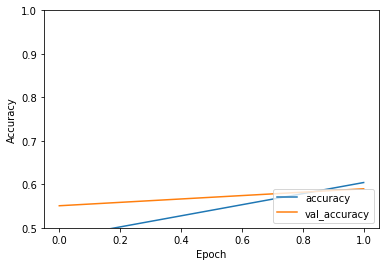

In [0]:
# Visualizar la curva del accurracy tanto en el entrenamiento como en validación
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Validar

Ahora vamos a evaluar el modelo, es decir, le entregaremos un conjunto de imágenes con las que no se entrenó, la respuesta y el modelo nos devolverá el error que tiene junto con las métricas calculadas, en este caso, el _accuracy_.


In [0]:
error, acc = model.evaluate(test_images,  test_labels, verbose=0)
print("Error: ", error)
print("Accuracy", acc)

Error:  1.15962815284729
Accuracy 0.5896999835968018


# Probar el modelo con una instancia

Ahora vamos a usar el modelo para predecir una resultado particular. Para empezar vamos a escoger un número entre 0 y 9999 para determinar una imagen a probar. Luego vamos a visualizar esa imagen y su etiqueta.

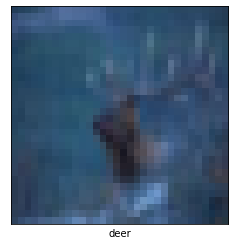

In [0]:
# Ver imagen
index_image = 22 # Número entre 0 y 9999.
image = test_images[index_image]
label = test_labels[index_image]

import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizar algunas imágenes.
plt.figure(figsize=(4,4))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image)
plt.xlabel(class_names[label[0]])
plt.show()

Para terminar, le pedimos al modelo que nos entregue las probabilidade de cada cada y con `np.argmax(probabilities)` encontramos la clase con mayor probabilidad, pero esto solo entrega el número de clase (0, 1, 2, etc). Finalmente con dicho número vemos a qué etiqueta corresponde.


In [0]:
import numpy as np

probabilities = model(np.array([image]))
class_names[np.argmax(probabilities)]

'bird'

# Guardar modelo

En muchas ocasiones necesitaremos guardar el avance que llevamos con nuestros modelos. 2 situaciones típicas que llevan a necesitar esto son:

* No disponemos de un computador/servidor para entrenar todo el tiempo que queramos. Por lo tanto entrenamos algunas épocas, guardamos y luego,  cuando volvamos a tener un computador/servidor, seguimos entrenando.

* Necesitaremos el modelo despues para predecir resultados.


Para guardar un modelo, hay 2 formas:
1. Guardar solo los pesos de todos los parámetros.
2. Guardar el modelo.


## Guardar pesos

Tal como su nombre indica, esta opción permite guardar solo los pesos de cada capa. Para hacer esto, el objeto modelo cuanta con un método llamado [`save_weights`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#save_weights) en donde se le entrega una ruta a un archivo y el modelo genera los archivos necesarios para guardar todos los pesos. A continuación vamos a guardar los pesos con el nombre **modelo_pesos.tf2** dentro de la carpeta **weights_save**

In [0]:
# Guardar pesos
model.save_weights('weights_save/modelo_pesos.tf2')

In [0]:
# Explorar que tiene la carpeta weights_save
!ls weights_save

checkpoint			      modelo_pesos.tf2.data-00001-of-00002
modelo_pesos.tf2.data-00000-of-00002  modelo_pesos.tf2.index


## Guardar modelo

Otra opción es guardar todo el modelo, eso incluye el optimizador que está ocupando, qué función de pérdida intentará minimizar y cualquier otra configuración del modelo. Para hacer esto, el objeto modelo cuanta un método llamado [`save`] en donde se le entrega la ruta a una carpeta y nuevamente el modelo genera los archivos necesarios para guardar toda su información. A continuación vamos a guardar todo el modelo en la carpeta **model_save**.

In [0]:
# Guardar modelo
model.save('model_save')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_save/assets


In [0]:
# Explorar que tiene la carpeta weights_save
!ls model_save

assets	saved_model.pb	variables


# Cargar modelo

Ahora vamos a aprender a como cargar el modelo. Este procesa es bien importante porque en muchas ocasiones puede que encontremos con modelos creados por otras personas que ya cumplen con el objetivo que nosotros buscamos o similar y con un alto rendimiento. Por lo tanto, es recomiendable cargar dichos modelos y probarlos antes de empezar todo de cero.

Dado que existen 2 formas de guardar un modelo (pesos o todo el modelo), existen 2 formas de cargar.

## Cargar pesos

Cuando uno va a cargar solamente los pesos, debe instanciar el modelo nuevamente y utlizar el método `load_weights` para cargar los pesos. A este método se le debe entregar la misma ruta en donde esté el archivo donde se guardó los pesos. En este caso será **'weights_save/modelo_pesos.tf2'**.

Finalmente, es necesario volver a compilar el modelo indicando qué optimizar ocupar, qué metricas y qué función de pérdida minimizar.

In [0]:
# Instanciar nuevamente el modelo
new_model = TutorialModel()

# Cargar pesos
new_model.load_weights('weights_save/modelo_pesos.tf2')

# Compilar nuevamente
new_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Y ahora vamos a probar cual es el _accuracy_ actual del modelo con los datos de _test_.

In [0]:
error, acc = model.evaluate(test_images,  test_labels, verbose=0)
print(acc)

0.5896999835968018


## Cargar todo el modelo

La otra opción es cargar el modelo. Para eso debemos utilizar la función `load_model` dentro del módulo **tf.keras.models**. A esta función le deben entregar el nombre de la carpeta que contiene toda la información del modelo guardado. En este caso será **'model_save'**.

En este caso, como el modelo ya tiene todo guardado, no es necesaio instanciar antes o compilar. Solo basta con cargar y luego podemos utilizarlo directamente.

In [0]:
# Cargar modelo
new_model_2 = tf.keras.models.load_model('model_save')

Y ahora vamos a probar cual es el _accuracy_ actual del modelo con los datos de _test_.

In [0]:
error, acc = new_model_2.evaluate(test_images,  test_labels, verbose=0)
print(acc)

0.5896999835968018


Como el modelo fue guardado con ambas formas sin un entrenamiento intermedio entre una forma de guardar y otra, ambos modelos (`new_model` y `new_model_2`) tienen los mismos pesos y por lo tanto, está bien que den el mismo __accuracy__.


# Para reflexion

Luego de ver este tutorial, ¿cómo cree que se puede aplicar deep learning a la recomendación? Pensando en los algoritmos anteriormente vistos ¿es posible utilizar estas nuevas técnicas para programarlos?